**Problem Statement**:


You are working for a new-age insurance company and employ mutiple outreach
plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


**Features:** 

age (numeric)

job : type of job

marital : marital status

educational_qual : education status

call_type : contact communication type

day: last contact day of the month (numeric)

mon: last contact month of year

dur: last contact duration, in seconds (numeric)

num_calls: number of contacts performed during this campaign and for this 
client 

prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


## **Importing Necessary Libraries**

In [3]:
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#reading data from csv file to dataframe
df=pd.read_csv("train.csv")

In [7]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [8]:
df.shape

(45211, 11)

In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [10]:
#Checking data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


There is no need to change the datatype of the coumns

In [11]:
#Checking & Handling Missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [12]:
#Checking for duplicates
df.duplicated().sum()

6

In [13]:
#Droping the duplicates
df=df.drop_duplicates()

In [14]:
df.shape

(45205, 11)

**Target Variable Y**

In [15]:
# Checking the target vairable is balanced or not
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [16]:
df['y'].value_counts(normalize=True)

no     0.883
yes    0.117
Name: y, dtype: float64

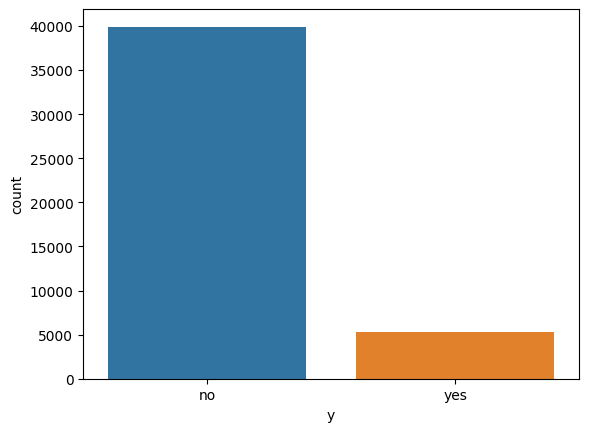

In [17]:
sns.countplot(x=df['y'])
plt.xticks
plt.show()

**Age**

In [18]:
#Checking the categorical features one by one.
df['age'].value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

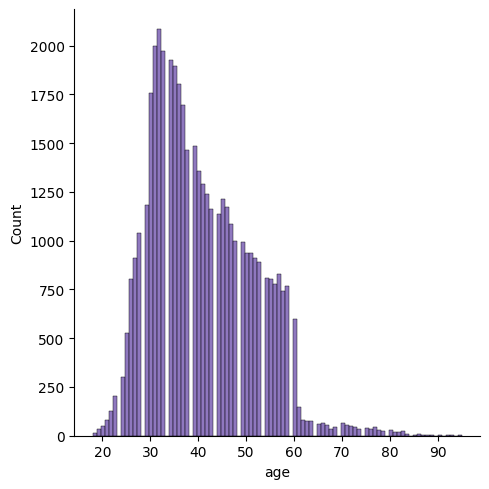

In [19]:
sns.displot(df['age'], color=np.random.rand(3,))

We can see that most of the clients fall in the age group between 20-60

**Job**

In [20]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [21]:
#Droping the unknown values in job column
index=df[(df['job']=='unknown')].index
df.drop(index, inplace=True)

In [22]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

<Axes: >

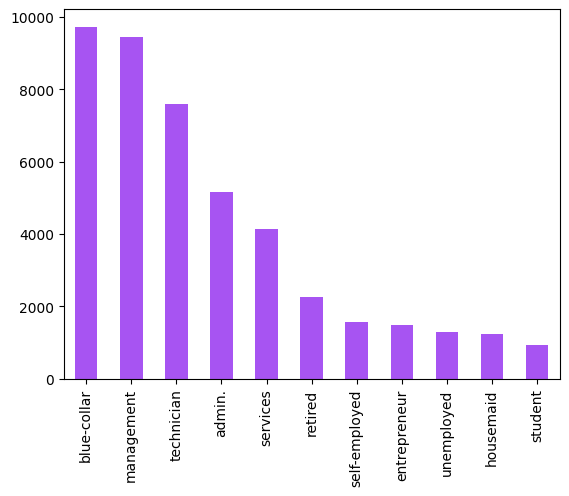

In [23]:
df['job'].value_counts().plot.bar(color=np.random.rand(3,))

We can see that most of the clients belongs to blue-collar job.

**Marital**

In [24]:
df['marital'].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

<Axes: >

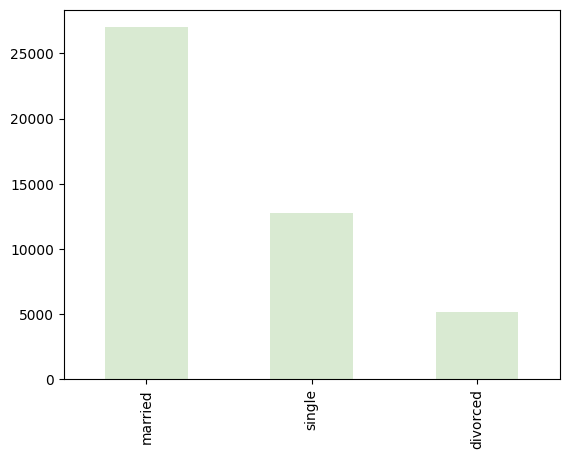

In [25]:
df['marital'].value_counts().plot.bar(color=np.random.rand(3,))

From the above chart we can see that most of the clients belongs to married category

**Education_Qual**

In [26]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [27]:
#Droping the unknown values in education_qual coulmn as it would not affect dataset
index=df[(df['education_qual']=='unknown')].index
df.drop(index, inplace=True)

In [28]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
Name: education_qual, dtype: int64

<Axes: >

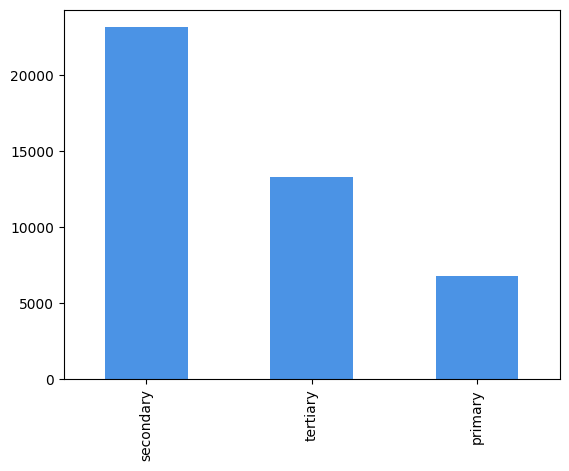

In [29]:
df['education_qual'].value_counts().plot.bar(color=np.random.rand(3,))

**Call_Type**

In [30]:
df['call_type'].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

<Axes: >

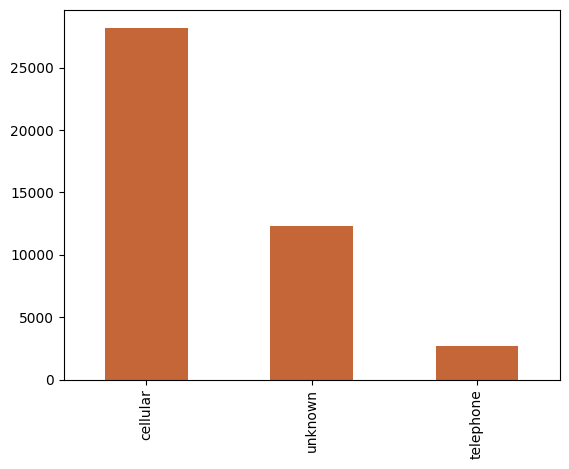

In [31]:
df['call_type'].value_counts().plot.bar(color=np.random.rand(3,))

Here We can see that most of the calls made to the client through cellular mode

**Day**

In [32]:
df['day'].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

<Axes: >

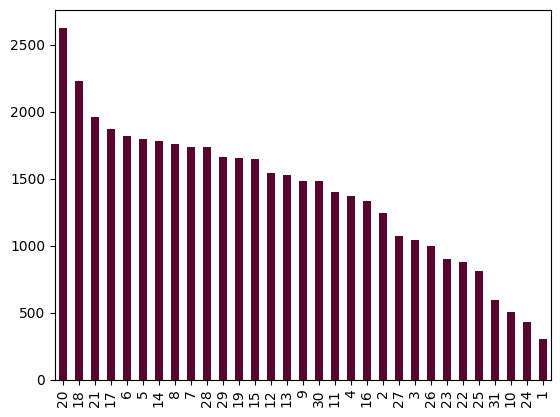

In [33]:
df['day'].value_counts().plot.bar(color=np.random.rand(3,))

Here with the above data, we can see that most of the calls made at day 20

**Month**

In [34]:
df['mon'].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

<Axes: >

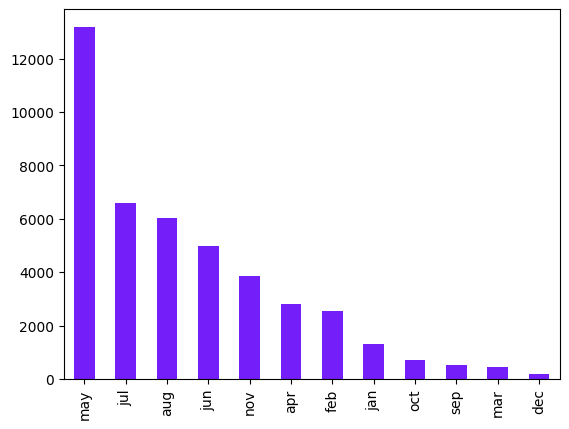

In [35]:
df['mon'].value_counts().plot.bar(color=np.random.rand(3,))

We can see the most of the clients contacted in may month

**Duration**

In [36]:
df['dur'].value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

**Number of calls**

In [37]:
df['num_calls'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
5        1
6        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: num_calls, Length: 43187, dtype: int64>

<Axes: >

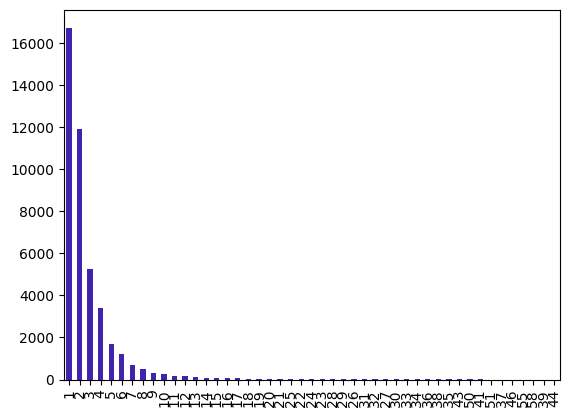

In [38]:
df['num_calls'].value_counts().plot.bar(color=np.random.rand(3,))

**Previous Outcome**

In [39]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

<Axes: >

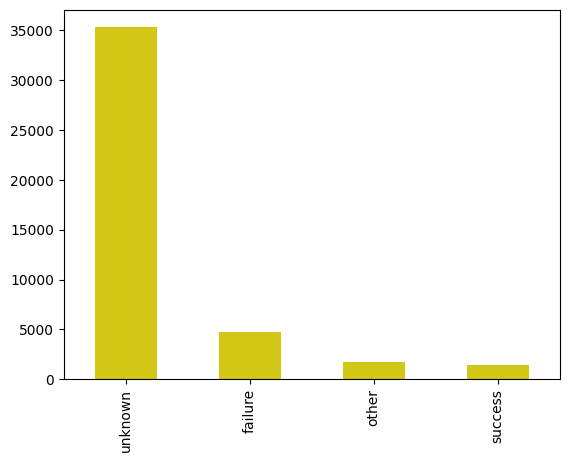

In [40]:
df['prev_outcome'].value_counts().plot.bar(color=np.random.rand(3,))

### **Outliers Detection & Correction**

**Age**

<Axes: xlabel='age'>

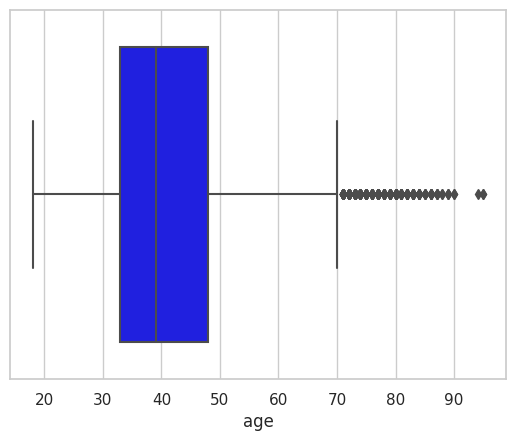

In [41]:
sns.set(style='whitegrid')
sns.boxplot(x=df['age'], color='blue')

We can that there are many dots displayed outside

In [42]:
q1, q3=np.percentile(df['age'],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age:",upper,"Lower age:", lower)

Upper age: 70.5 Lower age: 10.5


In [43]:
#Removing the outliers
df.age = df.age.clip(10.5,70.5)

<Axes: xlabel='age'>

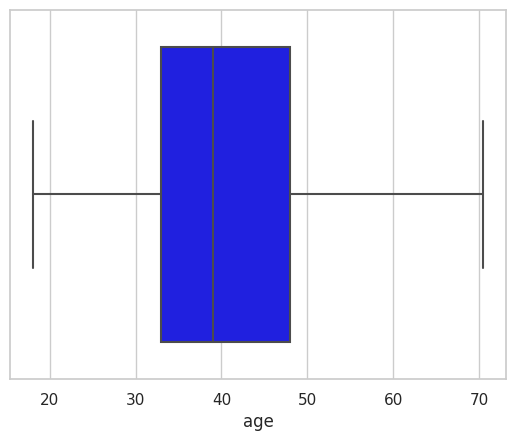

In [44]:
sns.set(style='whitegrid')
sns.boxplot(x=df['age'], color='blue')

**Days**

<Axes: xlabel='day'>

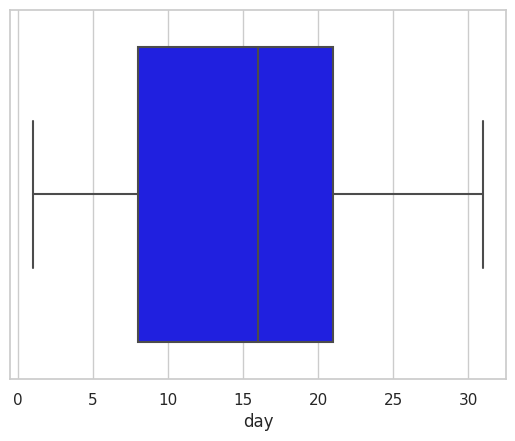

In [45]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='blue')

Here, there is no outlier found

**Duration**

<Axes: >

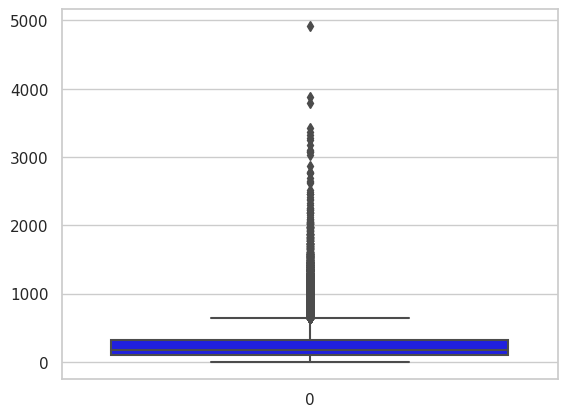

In [46]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='blue')

In [47]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper dur:",upper,"Lower dur:", lower)

Upper dur: 640.5 Lower dur: -219.5


In [48]:
#Removing the outliers
df['dur'] = df['dur'].clip(-219.5,640.5)

<Axes: >

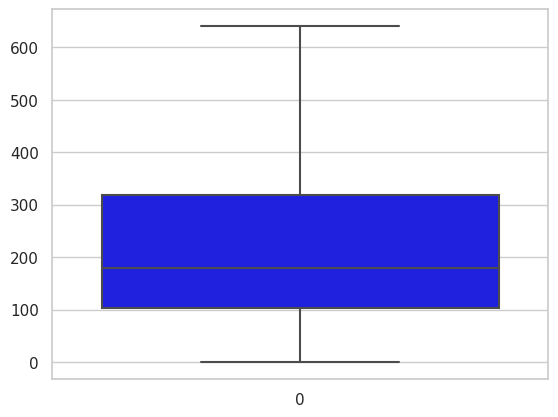

In [49]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='blue')

**Number of Calls**

<Axes: >

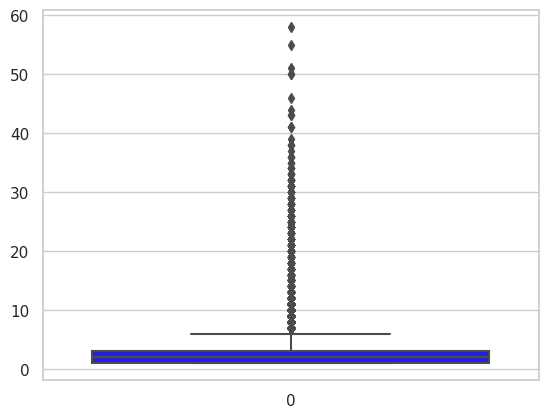

In [50]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='blue')

In [51]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper calls:",upper,"Lower calls :", lower)

Upper calls: 6.0 Lower calls : -2.0


In [52]:
df.num_calls = df.num_calls.clip(-2.0,6.0)

<Axes: >

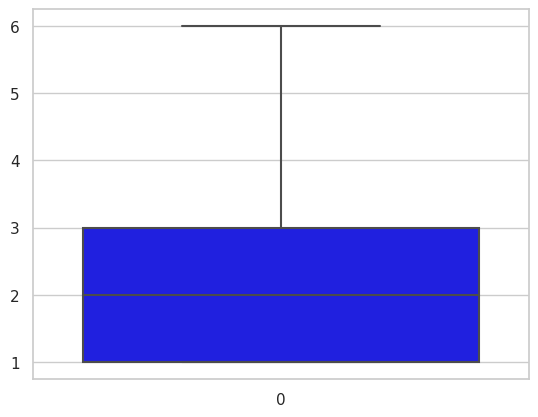

In [53]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='blue')

Outliers has been removed from the numerical data columns

In [54]:
df.shape

(43187, 11)

## **EDA to Predict Feature Importances**

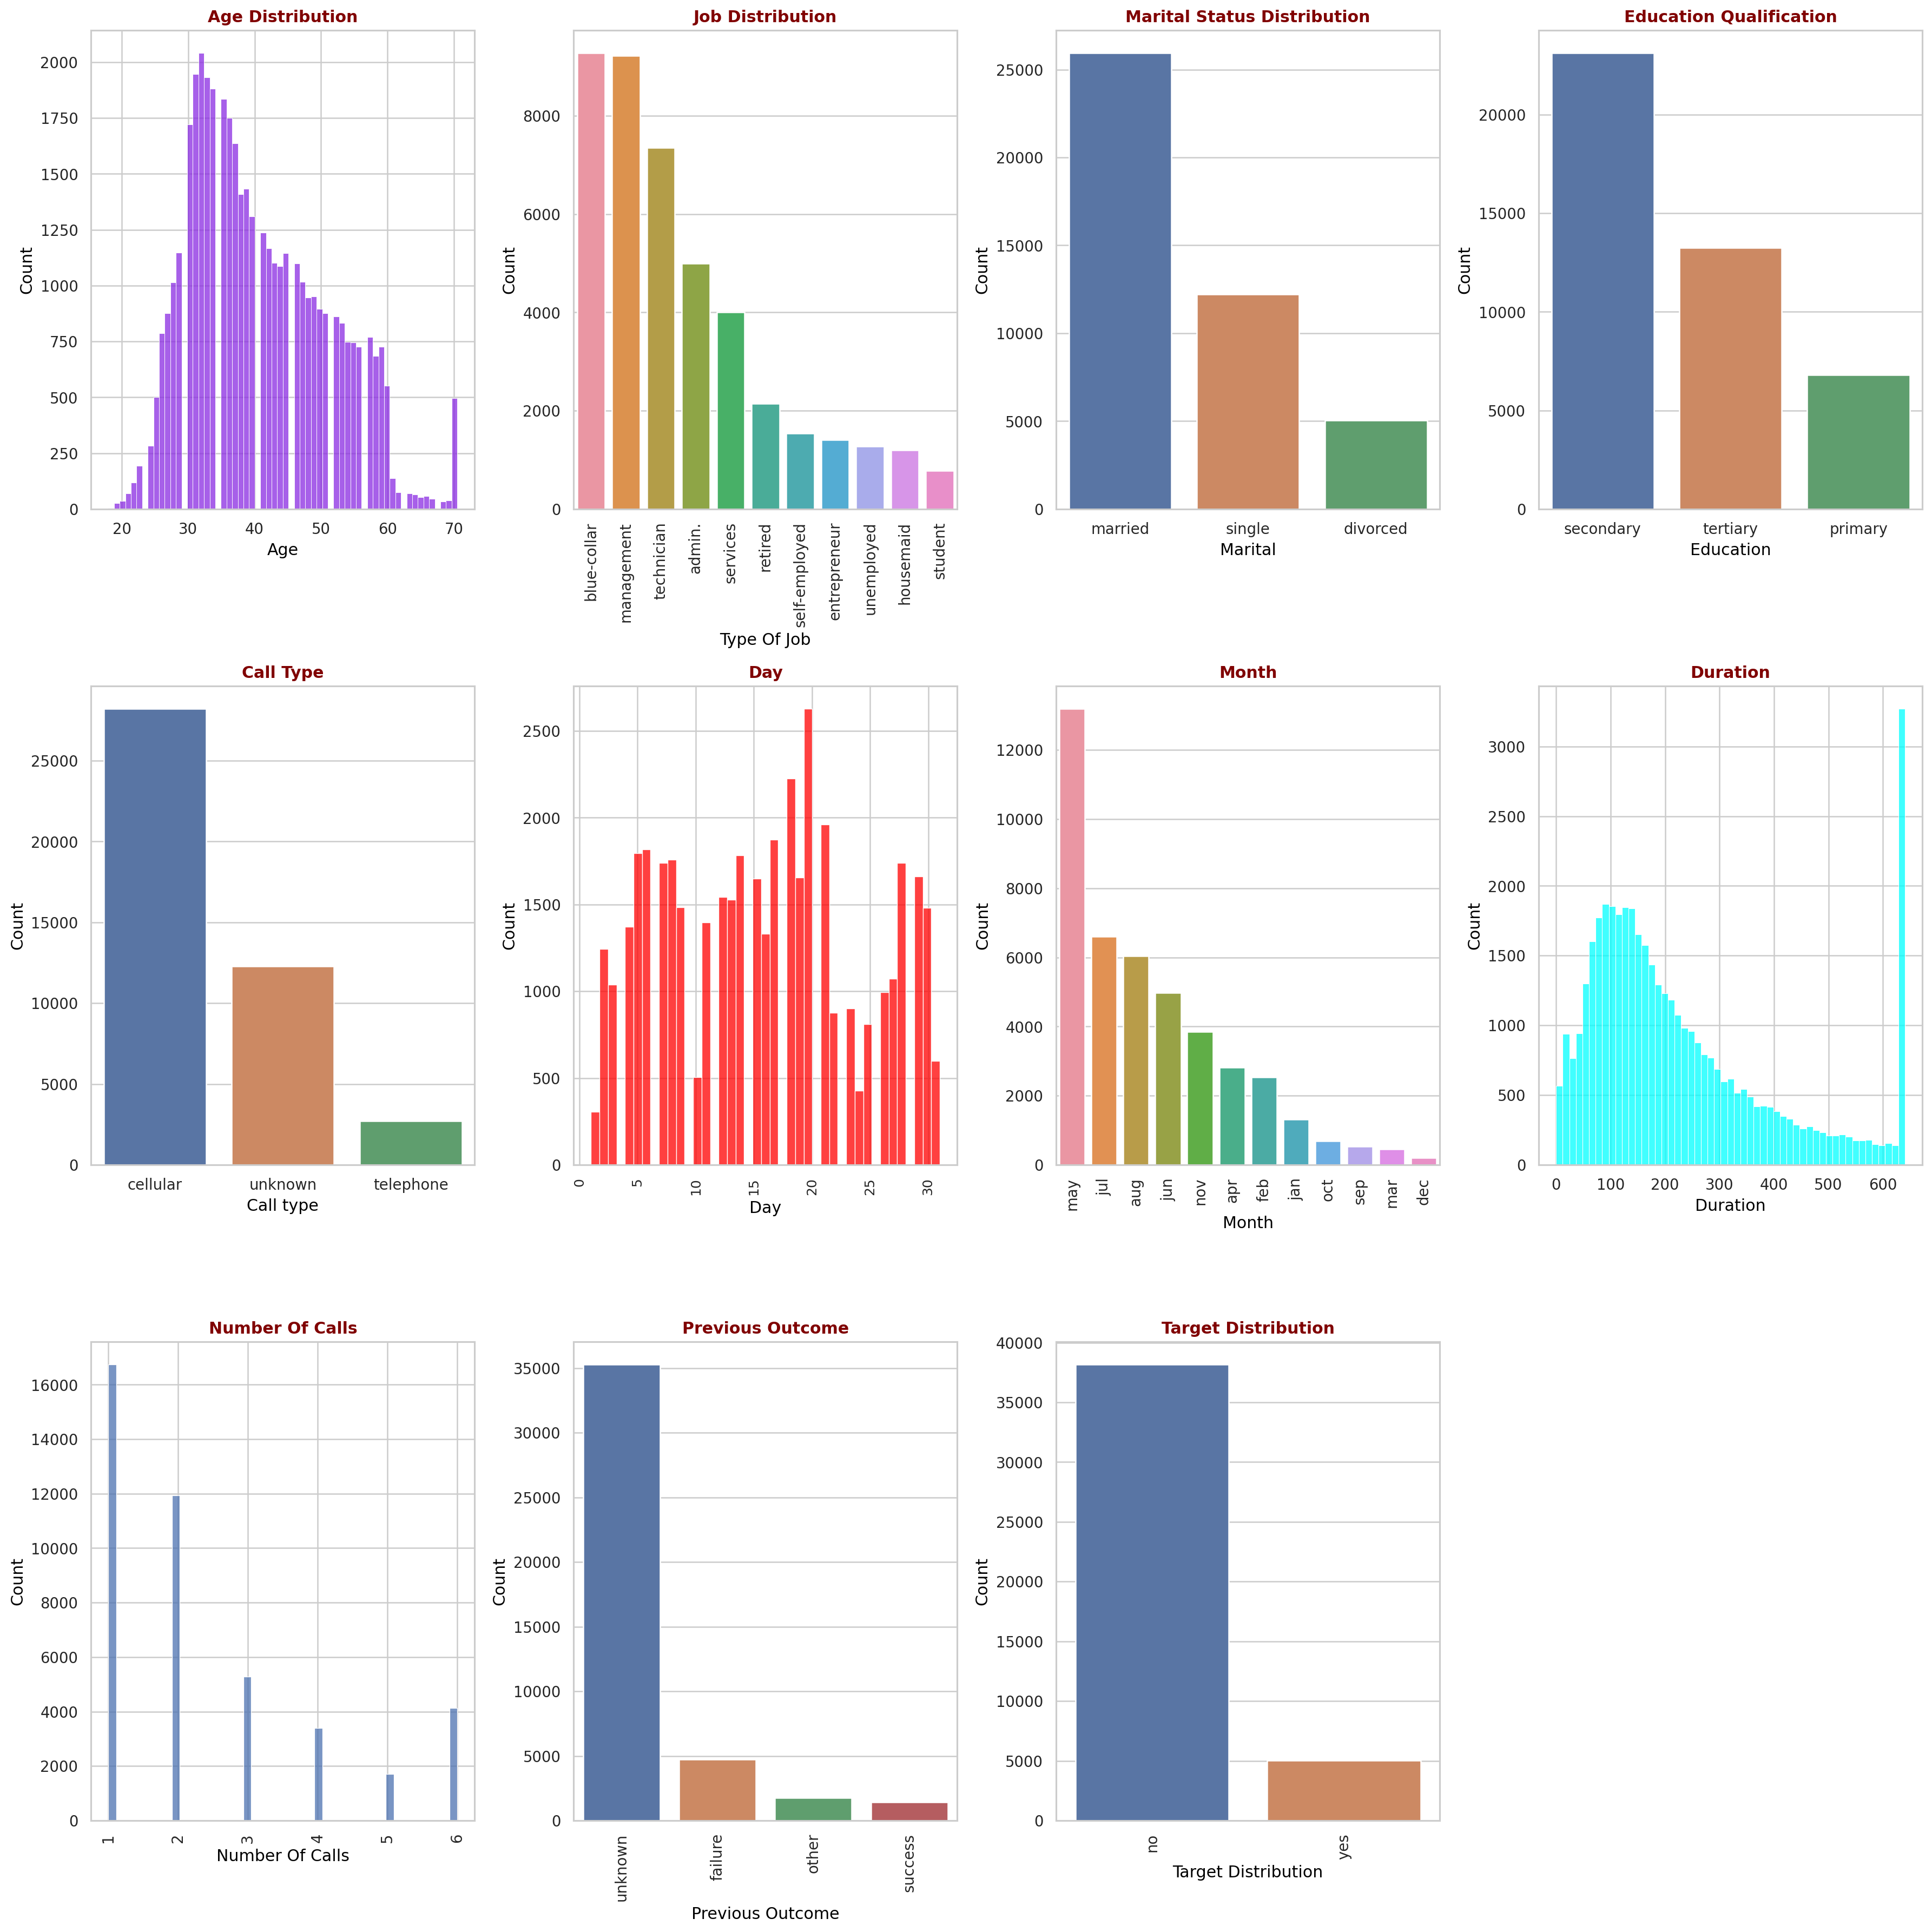

In [55]:
#Age Distribution
plt.figure(figsize = (20,20),dpi=180)  
plt.subplot(3,4,1) 
sns.histplot((df.age),color='BlueViolet')

# Get the current Axes object
ax = plt.gca()

plt.title('Age Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Age',fontsize = 12, color='black') 
plt.ylabel('Count',fontsize = 12, color='black')  

#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(x=df['job'],order=df['job'].value_counts().index)

# Get the current Axes object
ax = plt.gca()

plt.title('Job Distribution', fontsize = 12, color="maroon", fontweight='bold') 
plt.xlabel('Type Of Job',fontsize = 12, color='black') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='black')  

# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(x=df['marital'],order=df['marital'].value_counts().index)

# Get the current Axes object
ax = plt.gca()

plt.title('Marital Status Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Marital',fontsize = 12, color='black')  
plt.ylabel('Count',fontsize = 12, color='black')  

# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(x=df['education_qual'],order=df['education_qual'].value_counts().index) 

# Get the current Axes object
ax = plt.gca()

plt.title('Education Qualification', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Education',fontsize = 12, color='black')  
plt.ylabel('Count',fontsize = 12, color='black') 

# Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(x=df['call_type'],order=df['call_type'].value_counts().index) 

# Get the current Axes object
ax = plt.gca()

plt.title('Call Type', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Call type',fontsize = 12, color='black') 
plt.ylabel('Count',fontsize = 12, color='black')  

# Day distribution 
plt.subplot(3,4,6) 
sns.histplot(df['day'], color="red") 

# Get the current Axes object
ax = plt.gca()

plt.title('Day', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Day',fontsize = 12, color='black') 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 12, color='black')  

 # Month distribution 
plt.subplot(3,4,7) 
sns.countplot(x=df['mon'],order=df['mon'].value_counts().index)

# Get the current Axes object
ax = plt.gca()

plt.title('Month', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Month',fontsize = 12, color='black') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='black')  

# Duration distribution 
plt.subplot(3,4,8) 
sns.histplot((df.dur),color = 'cyan')

# Get the current Axes object
ax = plt.gca()

plt.title('Duration', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Duration',fontsize = 12, color='black') 
plt.ylabel('Count',fontsize = 12, color='black')  

# Number of call distribution 
plt.subplot(3,4,9) 
sns.histplot(df['num_calls']) 

# Get the current Axes object
ax = plt.gca()

plt.title('Number Of Calls', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Number Of Calls',fontsize = 12, color='black') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='black')  

# Previous outcome distribution 
plt.subplot(3,4,10) 
sns.countplot(x=df['prev_outcome'],order=df['prev_outcome'].value_counts().index) 

# Get the current Axes object
ax = plt.gca()

plt.title('Previous Outcome', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Previous Outcome',fontsize = 12, color='black') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='black')  

# Target distribution 
plt.subplot(3,4,11) 
sns.countplot(x=df['y'],order=df['y'].value_counts().index)

# Get the current Axes object
ax = plt.gca()

plt.title('Target Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('Target Distribution',fontsize = 12, color='black')
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='black')  

plt.tight_layout()

plt.show()

**Interpretations from the above graphs**

**1. Age** : Target : 30 to 40 years

**2. Job** : Target : blue-collar & management

**3. Marital Status** : Target : Maried

**4. Educational Qualification** : Target : Secondary

**5. Call Type** : Target : cellular

**6. Day** : Target : Mid of the month

**7. Month** : Target : May

**8. Duration** : call last around 1750 second

**9. No of Calls** : most people contacted one time

**10. Previous Outcome** : most people previous outcome was unknown



 **Categorical Feature Vs Target Variable-Job, Marital Status, Educational Qualification, Month, Call Type, Previous Outcome**

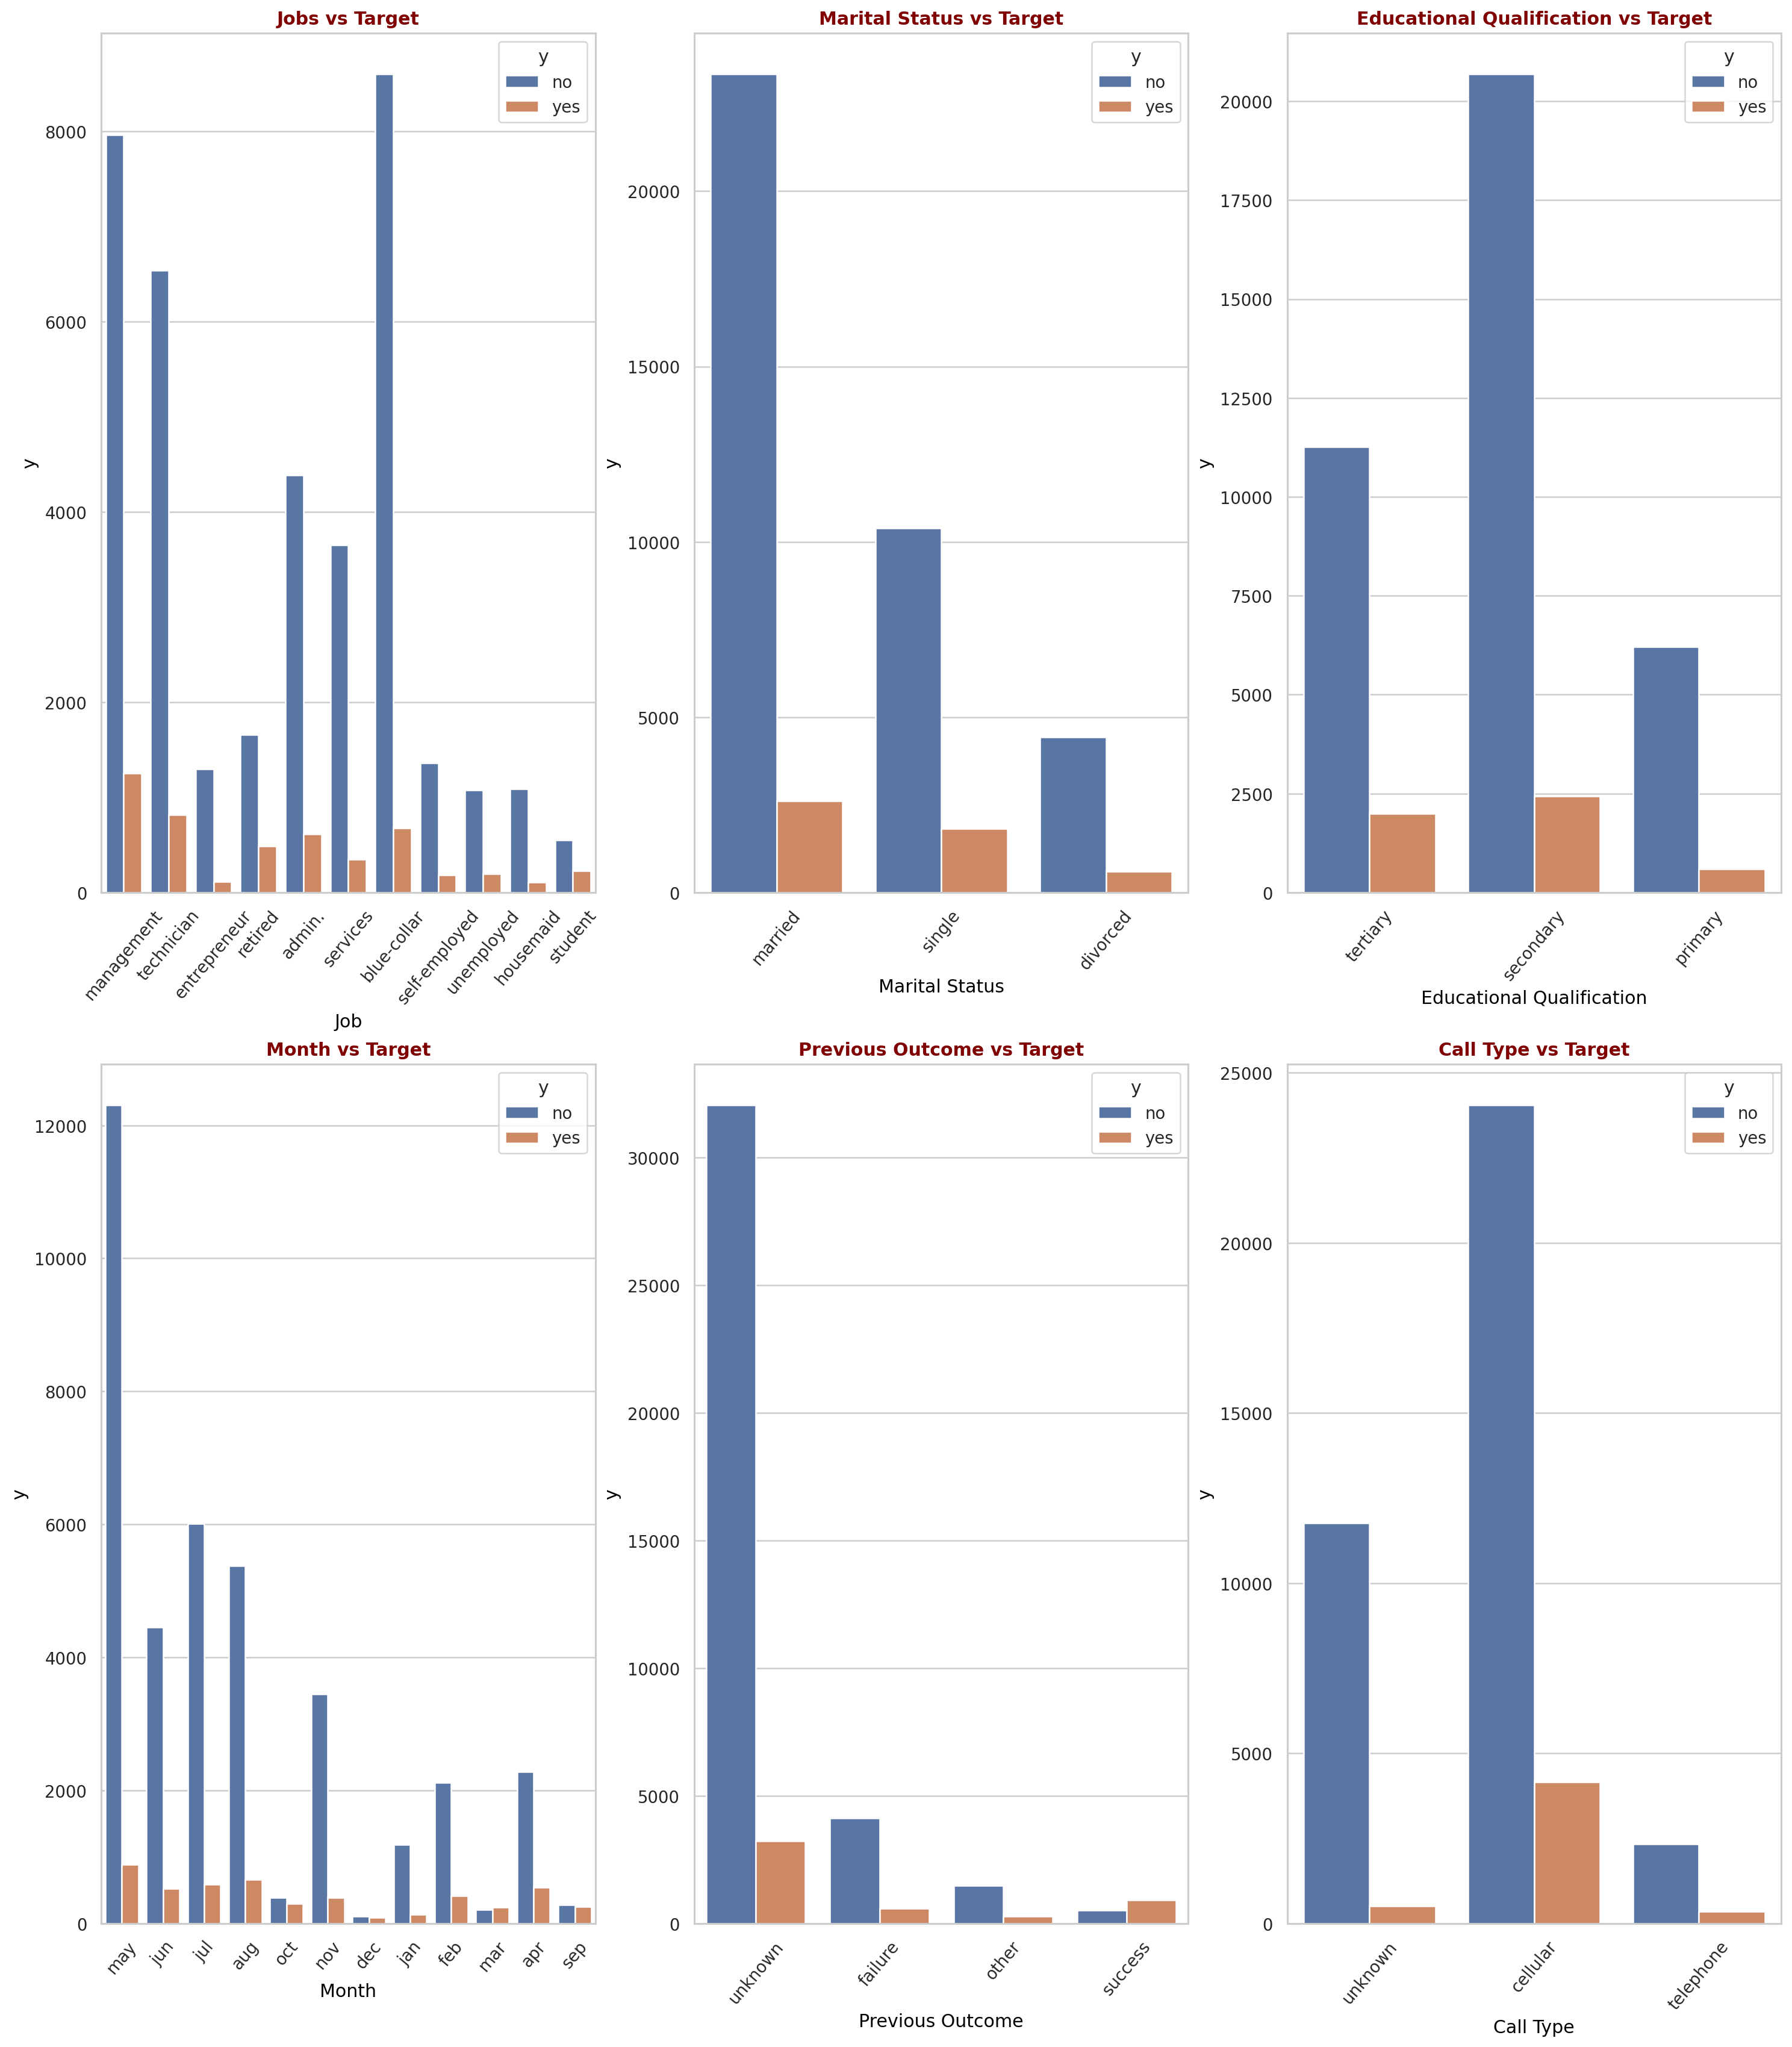

In [56]:
plt.figure(figsize=(20,35), dpi=180)

#Job vs Target
plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='black')
plt.ylabel('y', color='black')

#Marital Status vs Target
plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='black')
plt.ylabel('y', color='black')

#Educational Qualification vs Target
plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='black')
plt.ylabel('y', color='black')

#Month vs Target
plt.subplot(3,3,4)
sns.countplot(x='mon',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='black')
plt.ylabel('y', color='black')

#Previous Outcome vs Target
plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='black')
plt.ylabel('y', color='black')

#Call Type vs Target
plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='black')
plt.ylabel('y', color='black')

plt.show()

Based on the above Categorical Feature Vs Target Variable, we can say this

**Job vs Target**

Target (No): Blue collar

Success (Yes): Management

**Marital Status vs Target**

Target (No): Married

Success (Yes): Married

**Educational Qualification vs Target**

Target (No): Secondary

Success (Yes): Secondary

**Month vs Target**

Target (No): May

Success (Yes): May

**Previous Outcome vs Target**

Target (No): Unknown

Success (Yes): Unknown

**Call Type vs Target**

Target (No): Cellular

Success (Yes): Cellular

 **Numerical Variable vs Target Variable-Age, Day, Duration, No of Calls**

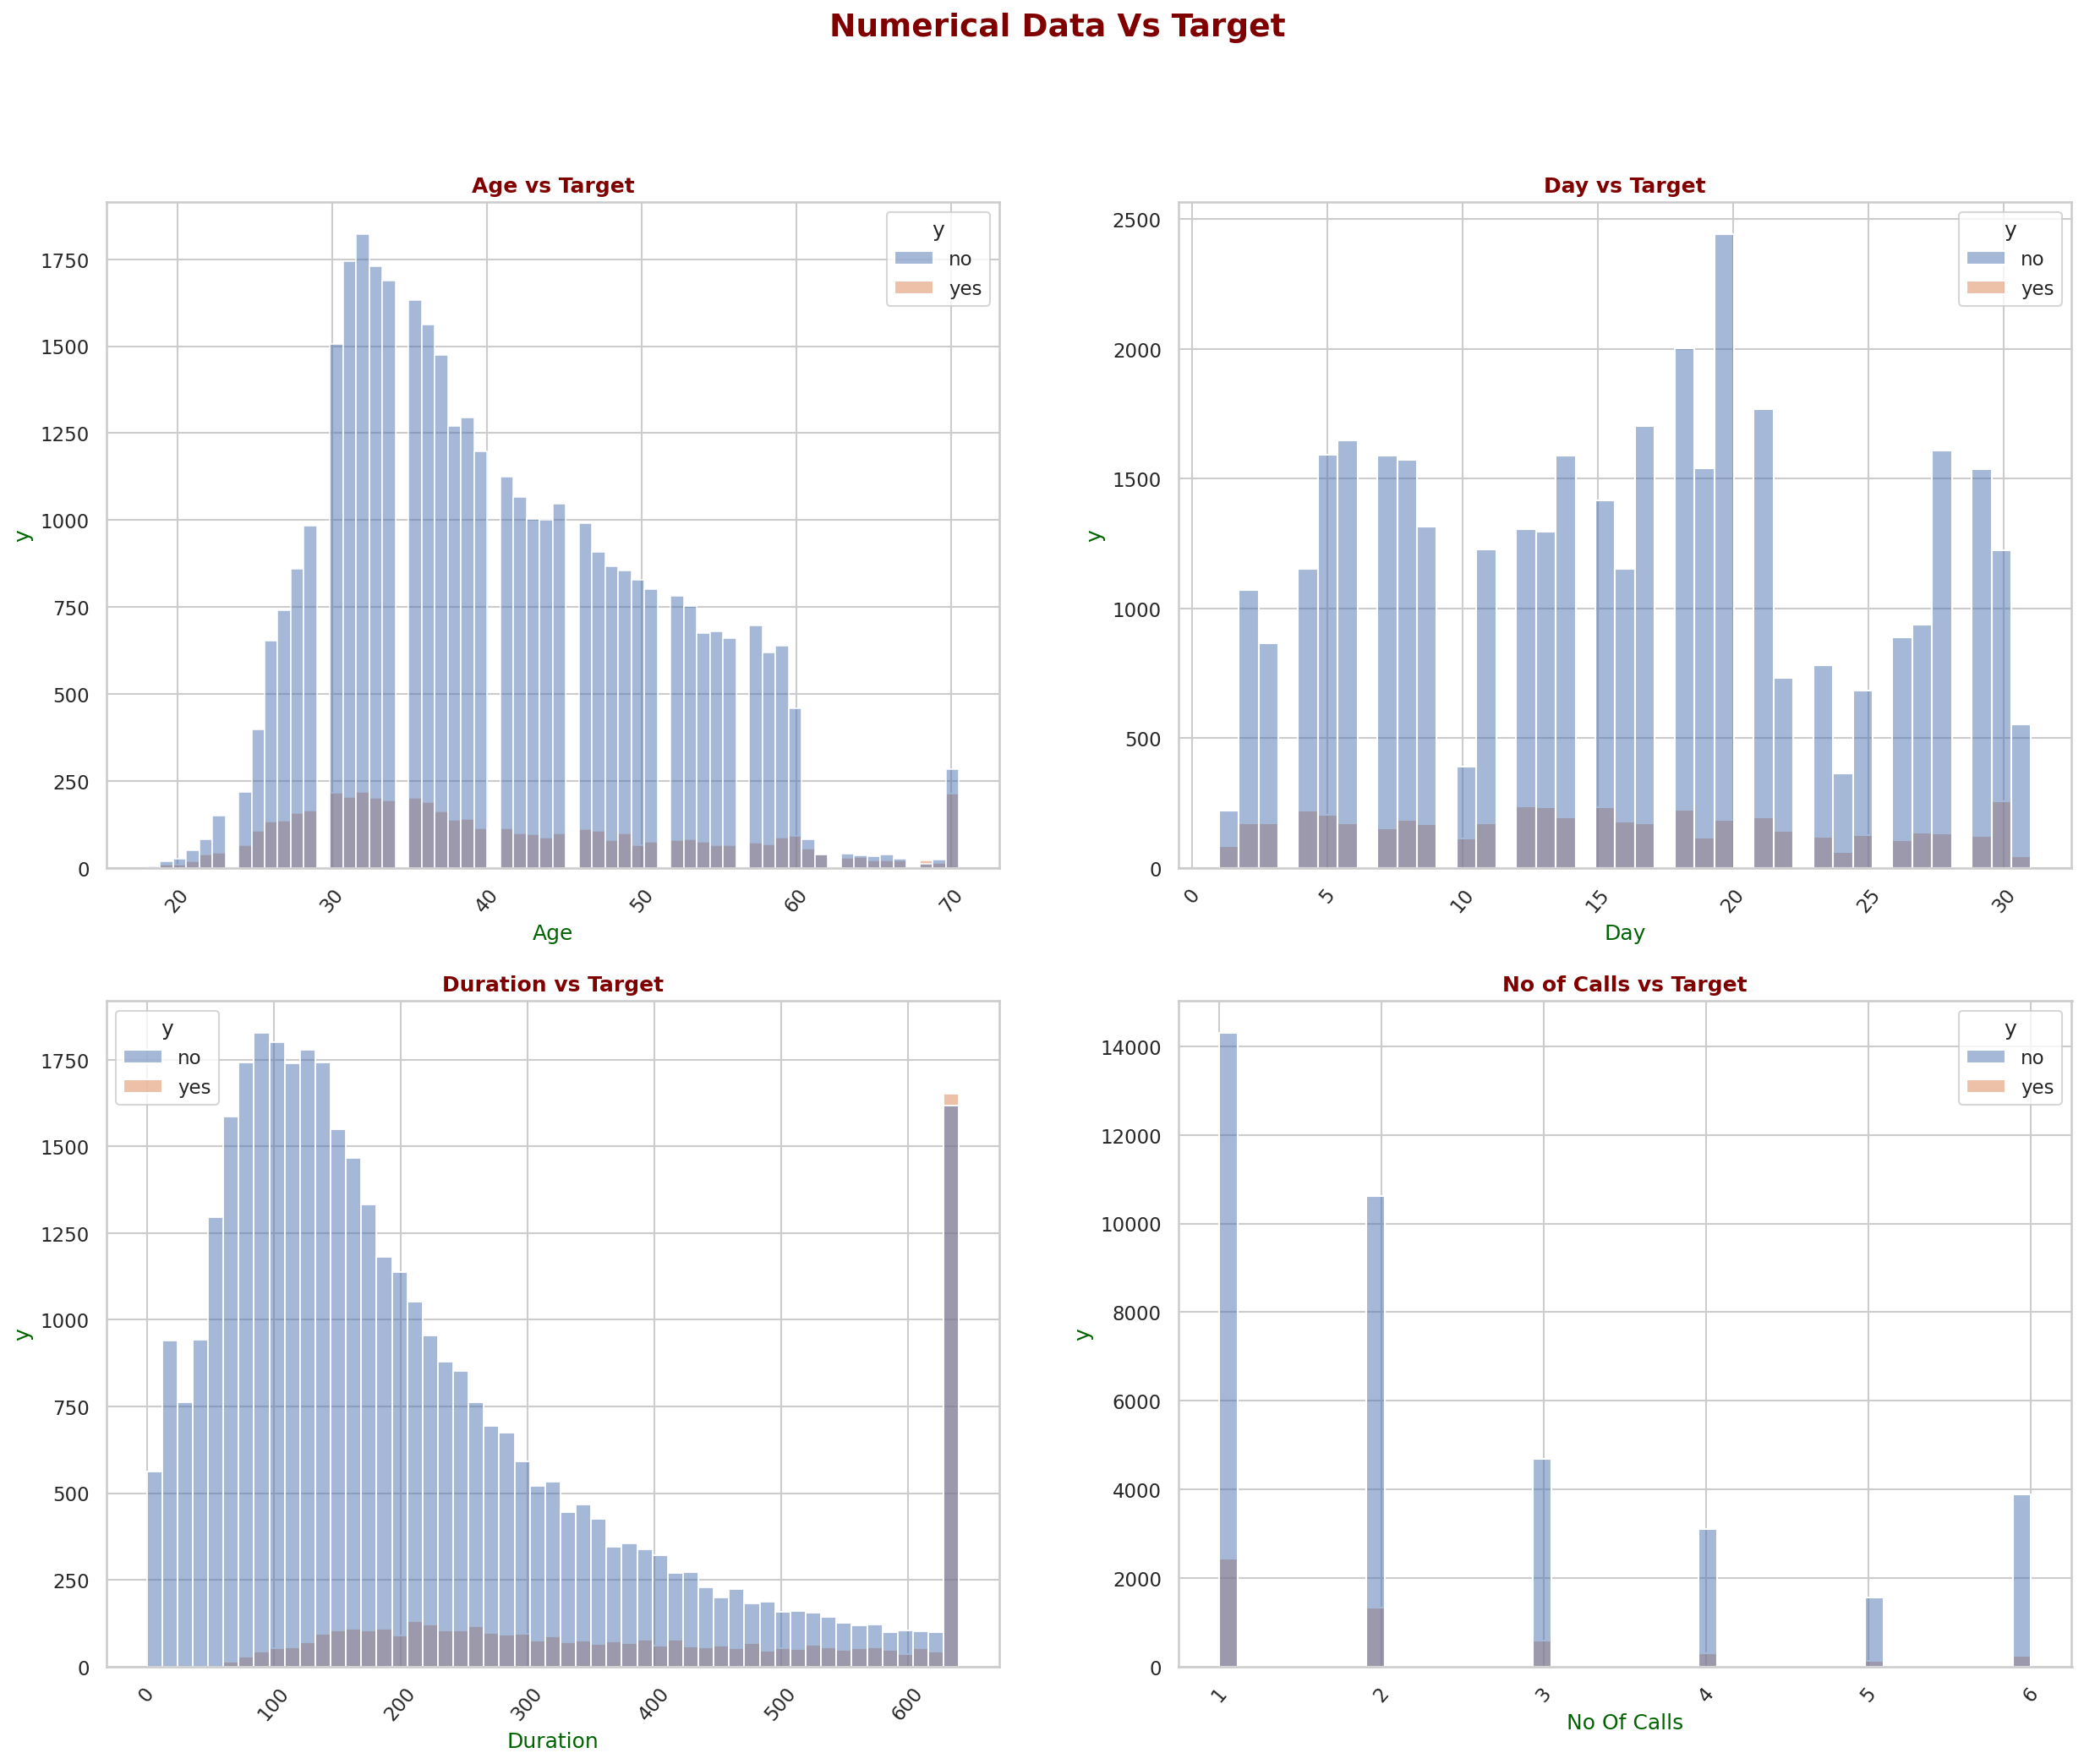

In [57]:
plt.figure(figsize=(20, 15), dpi=150)
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Day vs Target
plt.subplot(2,2,2)
sns.histplot(x='day',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Duration vs Target
plt.subplot(2,2,3)
sns.histplot(x='dur',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
sns.histplot(x='num_calls',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


Based on the above Numerical Data vs Target, we can say this

**Age vs Target**

Middle age people was the most targeted and subscribed.

**Day vs Target**

Most of the people was targeted on middle of month

**Duration vs Target**

Duration of call plays a major role in subscription

**Number of Calls vs Target**

If No of calls increases subscription decreases

# **Encoding Categorical Features**

In [58]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})

In [59]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1,1,no
1,44.0,5,3,2,1,5,1,151.0,1,1,no
2,33.0,2,1,2,1,5,1,76.0,1,1,no
5,35.0,8,1,3,1,5,1,139.0,1,1,no
6,28.0,8,3,3,1,5,1,217.0,1,1,no


# **Splitting**

In [72]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['y'].values
     

In [73]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [74]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [75]:
print(len(x_train_smt))
print(len(y_train_smt))

52531
52531


In [76]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Modelling**

**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7632553831905534

In [78]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.86194045, 0.13805955],
       [0.98955163, 0.01044837],
       [0.88312047, 0.11687953],
       ...,
       [0.23647349, 0.76352651],
       [0.1428719 , 0.8571281 ],
       [0.9677617 , 0.0322383 ]])

In [79]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


**K-Nearest Neighbour (KNN)**

In [80]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))
     

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8682561907214283
K value : 2 Train Score :  0.994898250556814 Cross Value Accuracy : 0.888747666409167
K value : 3 Train Score :  0.9773086368049342 Cross Value Accuracy : 0.8843495182610189
K value : 4 Train Score :  0.9777084007538406 Cross Value Accuracy : 0.8929150036479122
K value : 5 Train Score :  0.9670670651615236 Cross Value Accuracy : 0.8907159295738379
K value : 6 Train Score :  0.9676000837600655 Cross Value Accuracy : 0.8931466192438092
K value : 7 Train Score :  0.9613751879842379 Cross Value Accuracy : 0.8929158083344062
K value : 8 Train Score :  0.9612038605775637 Cross Value Accuracy : 0.8943040266512167
K value : 9 Train Score :  0.9564828387047648 Cross Value Accuracy : 0.894187883567229
K value : 10 Train Score :  0.9559688564847424 Cross Value Accuracy : 0.8954615681730399
K value : 20 Train Score :  0.9392358797662332 Cross Value Accuracy : 0.8940724110553196
K value : 30 Train Score :  0.9334297843178314 C

**K value=10 with train score 0.956 has a good cross validation accuracy of 0.895** 

In [81]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7937022458902524
AUROC on the sampled dataset :  0.5488320137627882


**Decision Tree**

In [83]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7880847423132628


In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score 
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(x_train_smt, y_train_smt) 
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7815765928689726  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8335459062267994  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8659648588452533  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.8909596238411605  Cross val score :  0.8953474368052874
Depth  :  5  Training Accuracy :  0.9166016257067255  Cross val score :  0.8966208531822671
Depth  :  6  Training Accuracy :  0.9296796177495193  Cross val score :  0.8949987393244927
Depth  :  7  Training Accuracy :  0.9395404618225429  Cross val score :  0.8938410636882537
Depth  :  8  Training Accuracy :  0.9478212864784603  Cross val score :  0.8917575962405048
Depth  :  9  Training Accuracy :  0.9571300755744228  Cross val score :  0.8904837775202783
Depth  :  10  Training Accuracy :  0.963335934971731  Cross val score :  0.8908326091154887
Depth  :  20  Training Accuracy :  0.9993146903733033  Cross val score :  0.87253

**Depth=5 with train score 0.916 has a good cross validation score of 0.896`**

In [85]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9166016257067255
AUROC on the sampled dataset :  0.8659446076755734


**Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")   
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [141]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt") 
  rf.fit(x_train, y_train) 
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt") 
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9993146903733033  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9993146903733033  Cross val score :  0.885061771121299
Depth  :  3  Training Accuracy :  0.9993146903733033  Cross val score :  0.8903296415071098
Depth  :  4  Training Accuracy :  0.9993146903733033  Cross val score :  0.8948738474739747
Depth  :  5  Training Accuracy :  0.9993146903733033  Cross val score :  0.8969867357379225
Depth  :  6  Training Accuracy :  0.9993146903733033  Cross val score :  0.8998522654997624
Depth  :  7  Training Accuracy :  0.9993146903733033  Cross val score :  0.902862429264671
Depth  :  8  Training Accuracy :  0.9993146903733033  Cross val score :  0.9034413675036053
Depth  :  9  Training Accuracy :  0.9993146903733033  Cross val score :  0.9042517452866157
Depth  :  10  Training Accuracy :  0.9993146903733033  Cross val score :  0.9055832831248317


**Depth=8 with Training Accuracy 0.999 has a good cross validation scorer of 0.904**

Models are tested, Below are the AUROC Value of each model

Logistic Regression-AUROC Score is **0.88**

KNN-AUROC Score is **0.528**

Decision Tree-AUROC Score is **0.897**

Random Forest-AUROC Score is **0.904**


From the above Scores, **Random Forest is the best model**

**Feature Importance**

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")   
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [145]:
rf.feature_importances_

array([5.61087521e-02, 1.40314814e-02, 1.96514619e-03, 1.00738344e-03,
       3.44692103e-02, 2.73292993e-05, 1.65190304e-01, 4.15858014e-01,
       5.80143717e-03, 3.05540941e-01])

In [160]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Conclusion:**

Based on the Feature Importance given by best machine Learning will predict if a client subscribed to the insurance.

Duration - Longer the call better influncing the clients

Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.

Day - People who subscribed to insurance are mostly mid of the month.

Month - In the month of may people subscribed to insurance are more.

Job - In this blue collar people are targeted more but people who subscribed more are from management job.